# Brain Tumor Classification using Deep Learning

In the domain of medical image analysis, accurately classifying brain tumors is a critical task that can significantly aid in diagnosis and treatment planning. This project focuses on building a Deep Learning model to classify brain tumors from MRI images into four distinct categories:

- **Glioma Tumor**
- **Meningioma Tumor**
- **No Tumor**
- **Pituitary Tumor**

To achieve this, we will utilize **VGG16**, a popular Convolutional Neural Network (CNN) architecture known for its high performance in image classification tasks. By leveraging **transfer learning**, we will adapt a pre-trained VGG16 model to our specific classification problem, thus reducing training time and improving model accuracy.

The dataset for this project is sourced from Kaggle, specifically the dataset hosted at [Brain Tumor Classification (MRI)](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri), which provides a comprehensive collection of labeled MRI images for our analysis.

<div style="text-align: center;">
    <img src="https://www.universitycancer.com/wp-content/uploads/2023/05/ucbc-may-blog-2.jpg" alt="Image">
</div>

# Importing Packages

In [1]:
import cv2
import os
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Preparing and Loading the Dataset

In [4]:
#creating file paths and defining folder structure
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'] 
img_path = '/kaggle/input/brain-tumor-classification-mri/Training/'

for label in labels:
    label_path = os.path.join(img_path, label)
    print(label_path)

/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor
/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor
/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor


In [5]:
#listing image files and labels
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir (img_path+label): 
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [6]:
#creating a dataframe for images and labels
df=pd.DataFrame({'img':img_list,'label':label_list})

In [7]:
df.sample(4) 

,img,label
1491,/kaggle/input/brain-tumor-classification-mri/T...,meningioma_tumor
2700,/kaggle/input/brain-tumor-classification-mri/T...,pituitary_tumor
2456,/kaggle/input/brain-tumor-classification-mri/T...,pituitary_tumor
1703,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor


In [8]:
df.shape

(2870, 2)

# Displaying One Image From Each Class

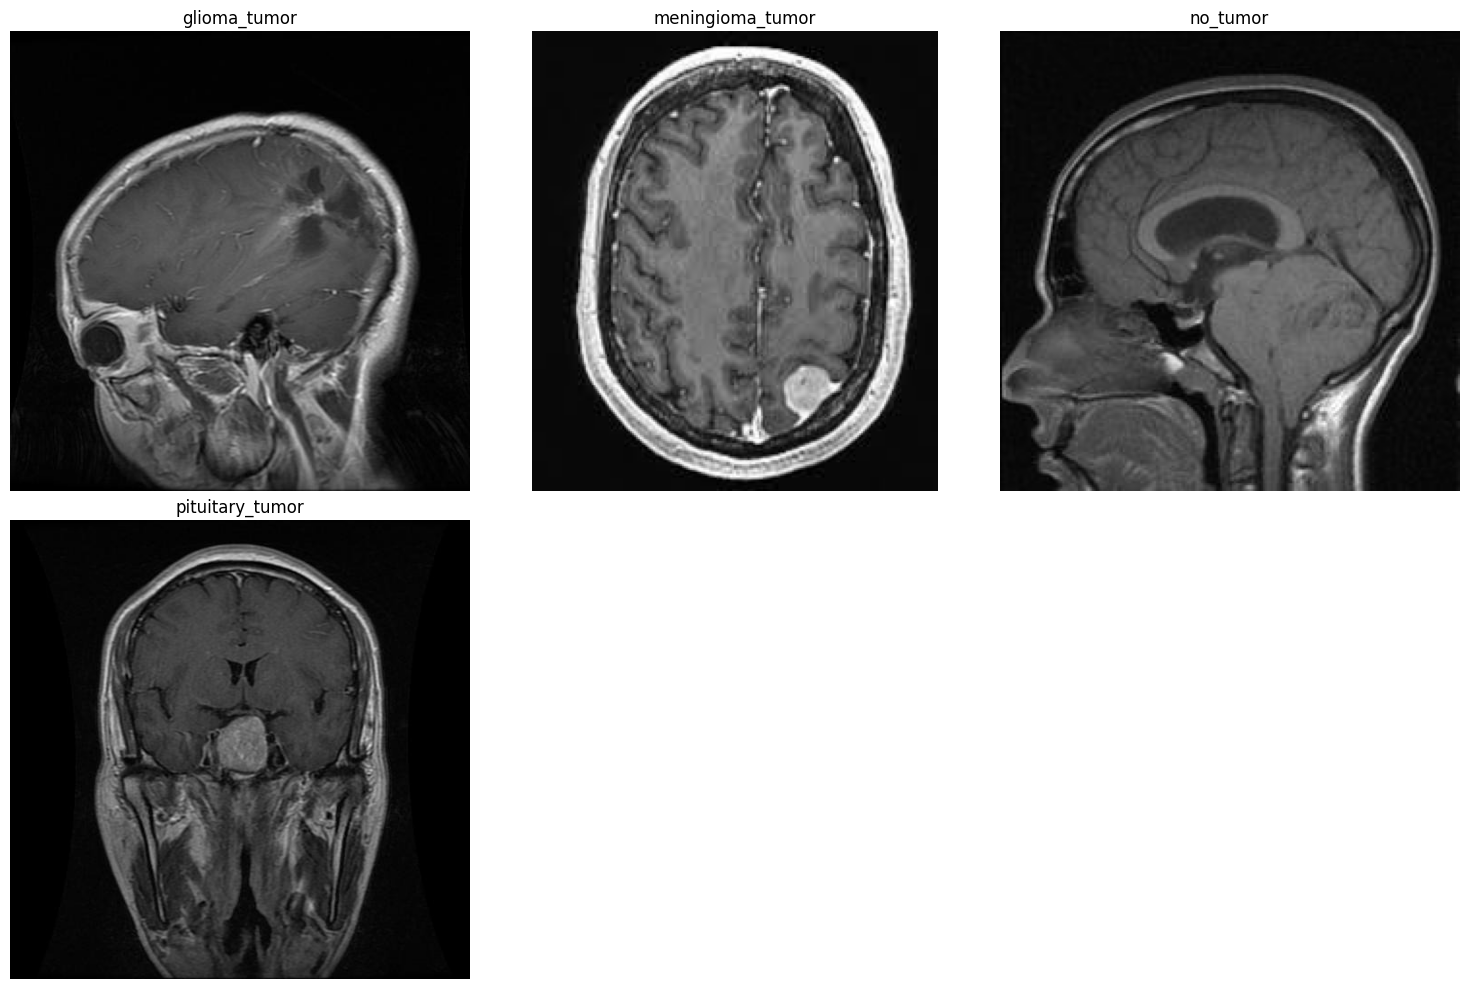

In [9]:
plt.figure(figsize=(15, 10))
for i, label in enumerate(labels):
    img_path = df[df['label'] == label]['img'].iloc[0]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i + 1) 
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Encoding Labels with Numerical Values

In [11]:
d={'glioma_tumor':0,'meningioma_tumor':1,'no_tumor':2,'pituitary_tumor':3} 
df['encode_label']=df['label'].map(d)

In [12]:
df.sample(4)

,img,label,encode_label
1183,/kaggle/input/brain-tumor-classification-mri/T...,meningioma_tumor,1
378,/kaggle/input/brain-tumor-classification-mri/T...,glioma_tumor,0
303,/kaggle/input/brain-tumor-classification-mri/T...,glioma_tumor,0
2200,/kaggle/input/brain-tumor-classification-mri/T...,pituitary_tumor,3


# Reading, Resizing and Normalizing Images

In [13]:
x=[]
for img in df['img']:
     img=cv2.imread(img)
     img=cv2.resize(img,(64,64)) 
     img=img/255.0
     x.append(img)

# CNN Modeling with Transfer Learning

In [24]:
x=np.array(x)
y=df['encode_label']

In [25]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [26]:
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [27]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(250, activation='relu'),
    Dense(150, activation='relu'),
    Dense(80, activation='relu'),
    Dense(4, activation='softmax')
])

base_model.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history= model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=8, verbose=0)

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 400)                 │         819,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 300)                 │         120,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 250)                 │          75,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 150)                 │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 80)                  │          12,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │             324 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,910,302 (68.32 MB)

 Trainable params: 1,065,204 (4.06 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,130,410 (8.13 MB)

In [30]:
#classification report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))
print("Accuracy Score: ", accuracy_score(y_true_classes, y_pred_classes))

18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 714ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       179
           1       0.73      0.84      0.78       169
           2       0.92      0.77      0.84        70
           3       0.89      0.95      0.92       156

    accuracy                           0.85       574
   macro avg       0.86      0.84      0.85       574
weighted avg       0.86      0.85      0.85       574

Accuracy Score:  0.8466898954703833


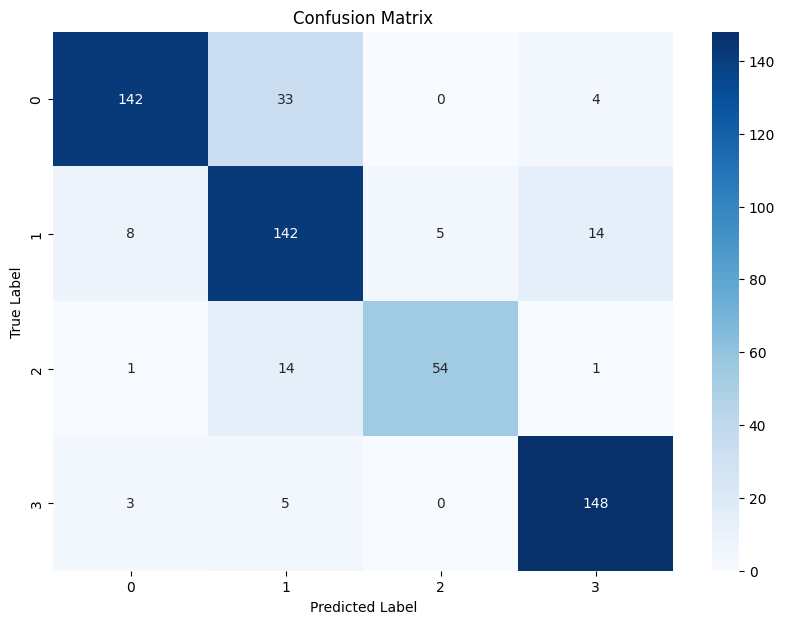

In [31]:
#confusion matrix
plt.figure(figsize=(10, 7)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(4), yticklabels=np.arange(4))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Conclusion

The classification report demonstrates the performance of our brain tumor classification model, which achieves an overall accuracy of approximately **84.67%**. Below are the detailed metrics for each tumor class:

- **Class 0 (Glioma Tumor)**
  - Precision: 0.92
  - Recall: 0.79
  - F1-Score: 0.85
  - Support: 179

- **Class 1 (Meningioma Tumor)**
  - Precision: 0.73
  - Recall: 0.84
  - F1-Score: 0.78
  - Support: 169

- **Class 2 (No Tumor)**
  - Precision: 0.92
  - Recall: 0.77
  - F1-Score: 0.84
  - Support: 70

- **Class 3 (Pituitary Tumor)**
  - Precision: 0.89
  - Recall: 0.95
  - F1-Score: 0.92
  - Support: 156

The **macro average** of precision, recall, and F1-score indicates a balanced performance across all classes, while the **weighted average** reflects the model's ability to handle imbalanced data effectively.

### Applications of the Model

Given the promising performance metrics, our deep learning model can be utilized in various fields, including:

1. **Radiology**: Assisting radiologists in the diagnosis of brain tumors by providing a second opinion based on MRI scans.
2. **Clinical Decision Support**: Enhancing decision-making processes in treatment planning by identifying tumor types accurately.
3. **Medical Research**: Facilitating research by providing a tool for analyzing large datasets of MRI images, contributing to studies on tumor prevalence and characteristics.

In summary, this model represents a significant step forward in the deployment of AI-driven tools to support healthcare professionals in the early detection and management of brain tumors.